In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

# Define the 5x5 input matrix
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# Reshape the input matrix to match TensorFlow's expected format: (batch_size, height, width, channels)
input_matrix = input_matrix.reshape(1, 5, 5, 1)

# Define the 3x3 kernel
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

# Reshape the kernel to match TensorFlow's expected format: (height, width, input_channels, output_channels)
kernel = kernel.reshape(3, 3, 1, 1)

# Define a function to perform convolution with given stride and padding
def perform_convolution(input_matrix, kernel, stride, padding):
    # Create a Conv2D layer with the given parameters
    conv_layer = Conv2D(filters=1, kernel_size=(3, 3), strides=(stride, stride), padding=padding, use_bias=False)
    # Set the kernel weights
    conv_layer.build(input_shape=input_matrix.shape)
    conv_layer.set_weights([kernel])
    # Perform convolution
    output = conv_layer(input_matrix)
    return output.numpy().squeeze()

# Perform convolution for each case
print("Stride = 1, Padding = 'VALID':")
print(perform_convolution(input_matrix, kernel, stride=1, padding='valid'))
print("\nStride = 1, Padding = 'SAME':")
print(perform_convolution(input_matrix, kernel, stride=1, padding='same'))
print("\nStride = 2, Padding = 'VALID':")
print(perform_convolution(input_matrix, kernel, stride=2, padding='valid'))
print("\nStride = 2, Padding = 'SAME':")
print(perform_convolution(input_matrix, kernel, stride=2, padding='same'))

Stride = 1, Padding = 'VALID':
[[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]

Stride = 1, Padding = 'SAME':
[[ -9.  -4.  -4.  -4.  13.]
 [-21.  -6.  -6.  -6.  27.]
 [-36.  -6.  -6.  -6.  42.]
 [-51.  -6.  -6.  -6.  57.]
 [-39.  -4.  -4.  -4.  43.]]

Stride = 2, Padding = 'VALID':
[[-6. -6.]
 [-6. -6.]]

Stride = 2, Padding = 'SAME':
[[ -9.  -4.  13.]
 [-36.  -6.  42.]
 [-39.  -4.  43.]]


In [3]:
import cv2
print(cv2.__version__)

4.11.0


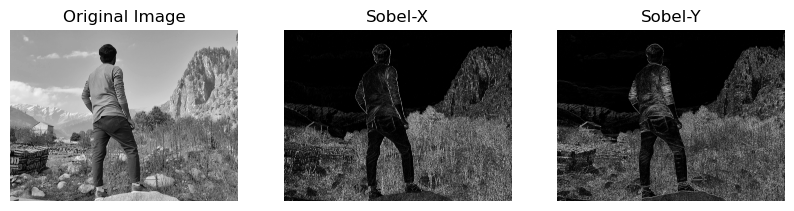

Original Matrix:
 [[105. 156.  52.  45.]
 [103.  68.  94.  84.]
 [225.  68.  90. 136.]
 [ 83.  56.  86. 217.]]

Max Pooled Matrix (2x2):
 [[156.  94.]
 [225. 217.]]

Average Pooled Matrix (2x2):
 [[108.    68.75]
 [108.   132.25]]


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

# Task 1: Edge Detection using Sobel Filter

def sobel_edge_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error: Unable to load image from {image_path}. Check the file path and format.")
        return
    
    # Apply Sobel filter
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Convert to absolute values and normalize
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    
    # Display images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Sobel-X")
    plt.imshow(sobel_x, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Sobel-Y")
    plt.imshow(sobel_y, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Task 2: Max Pooling and Average Pooling

def pooling_operations():
    # Create a random 4x4 matrix with integer values
    input_matrix = np.random.randint(0, 256, (1, 4, 4, 1), dtype=np.int32).astype(np.float32)
    
    # Define pooling layers
    max_pooling = MaxPooling2D(pool_size=(2, 2), strides=2)
    avg_pooling = AveragePooling2D(pool_size=(2, 2), strides=2)
    
    # Apply pooling
    max_pooled = max_pooling(input_matrix).numpy().squeeze()
    avg_pooled = avg_pooling(input_matrix).numpy().squeeze()
    
    # Print results
    print("Original Matrix:\n", input_matrix.squeeze())
    print("\nMax Pooled Matrix (2x2):\n", max_pooled)
    print("\nAverage Pooled Matrix (2x2):\n", avg_pooled)

# Run the functions
image_path = '/Users/damodar16613/Desktop/527d40cc-90bb-4fd8-a3e2-04fe8cc339a0.JPG'  # Provide an image file path
sobel_edge_detection(image_path)
pooling_operations()


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Conv2D, Flatten, Dense, Dropout, Input, Add
from tensorflow.keras.models import Model, Sequential

# Task 1: Implementing AlexNet
def alexnet():
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.summary()
    return model

# Task 2: Implementing a Residual Block and ResNet-like Model
def residual_block(input_tensor, filters=64):
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = Add()([x, input_tensor])  # Skip connection
    return tf.keras.layers.Activation('relu')(x)

def resnet_like():
    inputs = Input(shape=(224, 224, 3))
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = residual_block(x)
    x = residual_block(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.summary()
    return model

# Run the functions
alexnet()
resnet_like()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 112, 112,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 112, 112,  │     36,928 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 112, 112,  │     36,928 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 112, 112,  │          0 │ conv2d_7[0][0],   │
│                     │ 64)               │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 112, 112,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 112, 112,  │     36,928 │ conv2d_8[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 112, 112,  │          0 │ conv2d_9[0][0],   │
│                     │ 64)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 112, 112,  │          0 │ add_1[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 802816)    │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │ 102,760,5… │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10)        │      1,290 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,919,050 (392.61 MB)

 Trainable params: 102,919,050 (392.61 MB)

 Non-trainable params: 0 (0.00 B)

<Functional name=functional_1, built=True>